<a href="https://colab.research.google.com/github/Denisgomgue/colab_practice/blob/main/Data_Set_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio data set 1

In [ ]:
# Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [ ]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [ ]:
print("-----------------------------------")
print("Primeras 5 filas del dataset:")
display(df.head())

-----------------------------------
Primeras 5 filas del dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
print("-----------------------------------")
print("Características del dataset:")
print(iris.feature_names)

-----------------------------------
Características del dataset:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print("\n-----------------------------------")
print(f"Tamaño del dataset: {df.shape[0]} filas y {df.shape[1]} columnas")
# print("Número de muestras en el dataset Iris:", df.shape)



-----------------------------------
Tamaño del dataset: 150 filas y 5 columnas


In [ ]:
# Tipo de problema
print("\n-----------------------------------")
print("\nTipo de variable objetivo (target):", type(iris.target))
print("\n-----------------------------------")
print("Clases posibles:", iris.target_names)


-----------------------------------

Tipo de variable objetivo (target): <class 'numpy.ndarray'>

-----------------------------------
Clases posibles: ['setosa' 'versicolor' 'virginica']


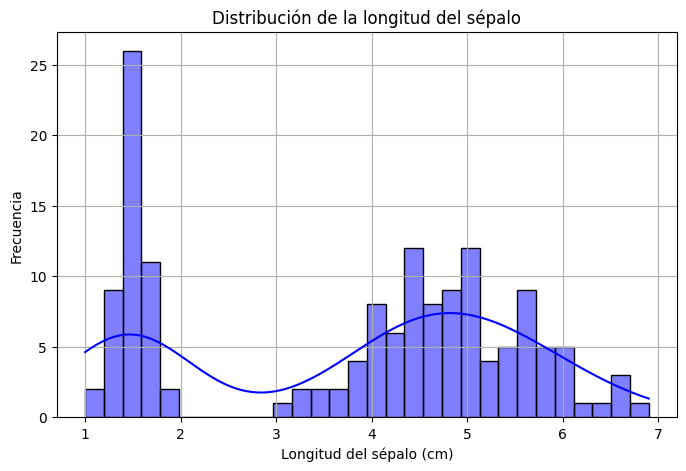

-----------------------------------


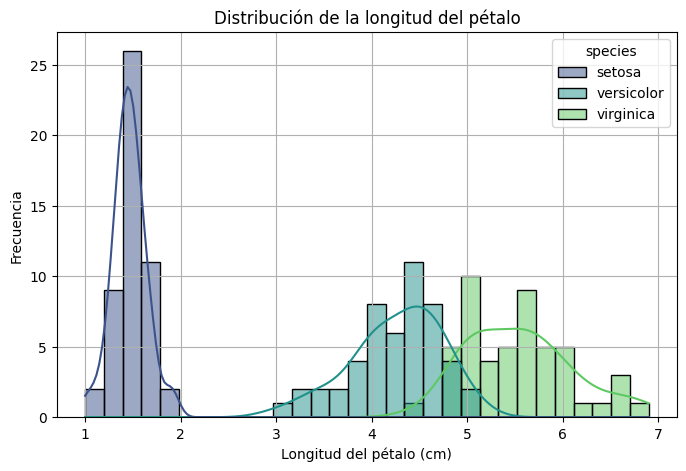

In [ ]:
# Histograma de una variable
plt.figure(figsize=(8,5))
sns.histplot(df['petal length (cm)'], kde=True, color='blue', bins=30)
plt.title('Distribución de la longitud del sépalo')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

print("-----------------------------------")
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='petal length (cm)', hue='species', kde=True, bins=30, palette='viridis')
plt.title('Distribución de la longitud del pétalo')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


# Ejercicio 2

In [ ]:
from sklearn.model_selection import train_test_split

# Variables predictoras (X) y variable objetivo (y)
X = df.drop('target', axis=1)
y = df['target']

# División del dataset: 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Cantidad de muestras
print(f"Cantidad de datos totales: {len(df)}")
print(f"Datos para entrenamiento: {len(X_train)}")
print(f"Datos para prueba: {len(X_test)}")


Cantidad de datos totales: 150
Datos para entrenamiento: 120
Datos para prueba: 30


# Ejercicio **3**

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Si las etiquetas están en formato de texto (como en tu caso), usar LabelEncoder
# Esto convierte 'setosa', 'versicolor', 'virginica' a 0, 1, 2
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(iris.target_names[iris.target])  # Convierte las etiquetas si es necesario

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Predicción sobre datos de prueba
y_pred = knn.predict(X_test)
# Concatenate predictions and true labels for display
results_df = pd.DataFrame({'Predictions': y_pred, 'True Labels': y_test})

# Display the first five rows
print(results_df.head(10))

   Predictions  True Labels
0            1            1
1            0            0
2            2            2
3            1            1
4            1            1
5            0            0
6            1            1
7            2            2
8            1            1
9            1            1


In [ ]:
# Evaluar precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN: {accuracy:.4f}")

Precisión del modelo KNN: 1.0000


In [ ]:
# Reporte más detallado
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Matriz de confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Ejercicio 4.1


In [ ]:
import matplotlib.pyplot as plt

# Datos de las inversiones
inversiones = ['Inversión A', 'Inversión B']
montos = [2000, 2500]
tasas = [0.12, 0.10]
ganancias = [montos[i] * tasas[i] for i in range(len(montos))]



In [ ]:
# Mostrar rentabilidades
for i in range(len(inversiones)):
    print(f"{inversiones[i]}: Rentabilidad = S/. {ganancias[i]:.2f}")




Inversión A: Rentabilidad = S/. 240.00
Inversión B: Rentabilidad = S/. 250.00


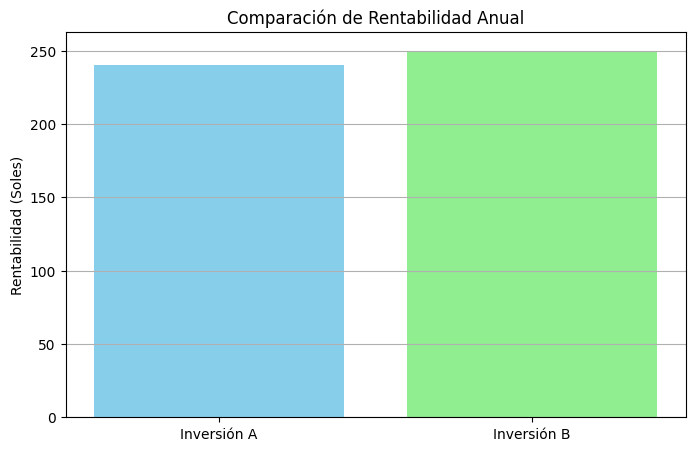

In [ ]:
# Gráfico de barras: Comparar ganancias
plt.figure(figsize=(8,5))
plt.bar(inversiones, ganancias, color=['skyblue', 'lightgreen'])
plt.title('Comparación de Rentabilidad Anual')
plt.ylabel('Rentabilidad (Soles)')
plt.grid(axis='y')
plt.show()



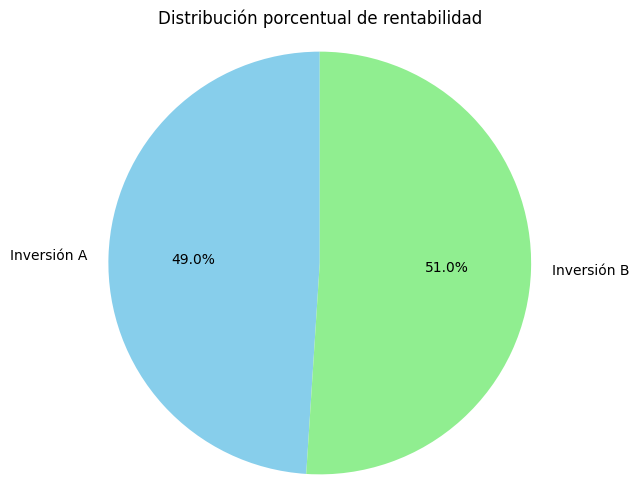

In [ ]:
# Gráfico circular: Porcentaje de la rentabilidad total
plt.figure(figsize=(6,6))
plt.pie(ganancias, labels=inversiones, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
plt.title('Distribución porcentual de rentabilidad')
plt.axis('equal')
plt.show()

# Ejercicio 4.2

1. Sueldo neto del empleado después de descuentos:
Salario bruto: 9075.00  PEN)
Descuentos:
  Seguridad social (8%): 726.00  PEN)
  Impuesto sobre la renta (5%): 453.75 PEN)
  Pensión (3%): 272.25 PEN)
Total descuentos: 1452.00 PEN)
Sueldo neto: 7623.00 PEN)

2. Total recibido (sueldo neto + bono):
Bono: 726.00 PEN)
Total recibido: 8349.00 PEN)


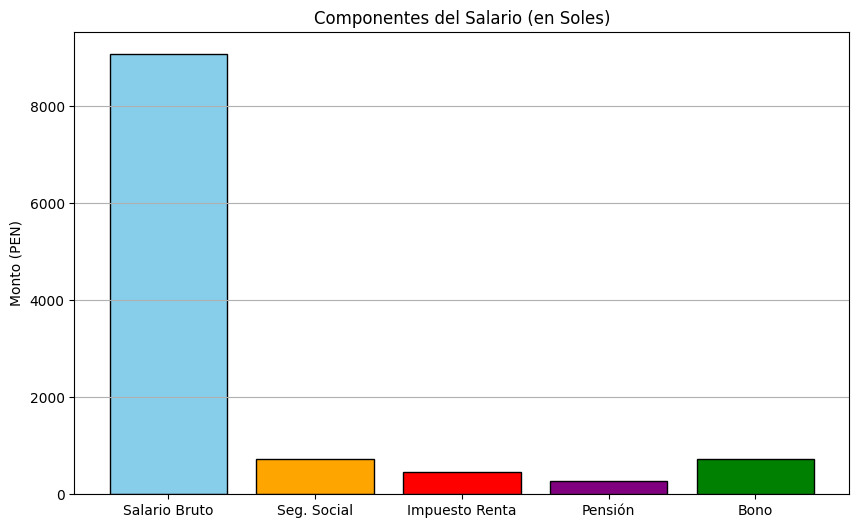

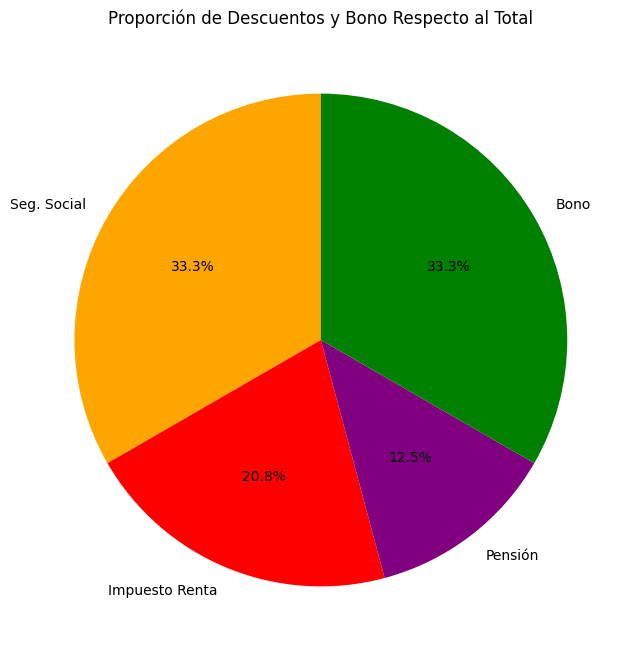

In [ ]:
import matplotlib.pyplot as plt

# Datos iniciales
salario_bruto_usd = 2500
bono_usd = 200
tasa_cambio = 3.63

#Hacemos el cambio de moneda de USD a PEN
bono = bono_usd * tasa_cambio
salario_bruto = salario_bruto_usd * tasa_cambio

desc_seguridad_social = 0.08
desc_impuesto_renta = 0.05
desc_pension = 0.03

# Cálculo de descuentos en USD
seg_social = salario_bruto * desc_seguridad_social
impuesto_renta = salario_bruto * desc_impuesto_renta
pension = salario_bruto * desc_pension
total_descuentos = seg_social + impuesto_renta + pension

# Sueldo neto en USD
sueldo_neto = salario_bruto - total_descuentos

# Total recibido en USD
total_recibido = sueldo_neto + bono



# Respuesta 1: Sueldo neto
print("1. Sueldo neto del empleado después de descuentos:")
print(f"Salario bruto: {salario_bruto:.2f}  PEN)")
print(f"Descuentos:")
print(f"  Seguridad social (8%): {seg_social:.2f}  PEN)")
print(f"  Impuesto sobre la renta (5%): {impuesto_renta:.2f} PEN)")
print(f"  Pensión (3%): {pension:.2f} PEN)")
print(f"Total descuentos: {total_descuentos:.2f} PEN)")
print(f"Sueldo neto: {sueldo_neto:.2f} PEN)")

# Respuesta 2: Total recibido
print("\n2. Total recibido (sueldo neto + bono):")
print(f"Bono: {bono:.2f} PEN)")
print(f"Total recibido: {total_recibido:.2f} PEN)")

# Gráfico de barras
plt.figure(figsize=(10, 6))
categorias = ['Salario Bruto', 'Seg. Social', 'Impuesto Renta', 'Pensión', 'Bono']
valores = [salario_bruto, seg_social, impuesto_renta, pension, bono]
colores = ['skyblue', 'orange', 'red', 'purple', 'green']
plt.bar(categorias, valores, color=colores, edgecolor='black')
plt.title('Componentes del Salario (en Soles)')
plt.ylabel('Monto (PEN)')
plt.grid(True, axis='y')
plt.savefig('salario_barras.png')
plt.show()

# Gráfico circular
plt.figure(figsize=(8, 8))
etiquetas = ['Seg. Social', 'Impuesto Renta', 'Pensión', 'Bono']
valores_pie = [seg_social, impuesto_renta, pension, bono]
plt.pie(valores_pie, labels=etiquetas, autopct='%1.1f%%', colors=colores[1:], startangle=90)
plt.title('Proporción de Descuentos y Bono Respecto al Total')
plt.savefig('salario_circular.png')
plt.show()

Ejercicio 4.2 (Forma 2)

In [ ]:
# Datos en dólares
salario_bruto_usd = 2500
bono_usd = 200

# Tasa de cambio aproximada
tasa_cambio = 3.63

# Convertimos a soles
salario_bruto_pen = salario_bruto_usd * tasa_cambio
bono_pen = bono_usd * tasa_cambio

print(f"Salario bruto: {salario_bruto_pen:.2f} PEN")
print(f"Bono: {bono_pen:.2f} PEN")

Salario bruto: 9075.00 PEN
Bono: 726.00 PEN


In [ ]:
# Descuentos porcentuales
seguridad_social = 0.08   # 8%
impuesto_renta = 0.05     # 5%
pension = 0.03            # 3%

# Calcular monto de descuentos
descuento_ss = salario_bruto_pen * seguridad_social
descuento_ir = salario_bruto_pen * impuesto_renta
descuento_pension = salario_bruto_pen * pension

# Total de descuentos
total_descuentos = descuento_ss + descuento_ir + descuento_pension

# Salario neto
salario_neto_pen = salario_bruto_pen - total_descuentos

# Total recibido (neto + bono)
total_recibido = salario_neto_pen + bono_pen

# Mostrar resultados
print(f"Descuento Seguridad Social: {descuento_ss:.2f} PEN")
print(f"Descuento Impuesto a la Renta: {descuento_ir:.2f} PEN")
print(f"Descuento Pensión: {descuento_pension:.2f} PEN")
print(f"Total descuentos: {total_descuentos:.2f} PEN")
print(f"Salario Neto: {salario_neto_pen:.2f} PEN")
print(f"Total recibido (neto + bono): {total_recibido:.2f} PEN")

Descuento Seguridad Social: 726.00 PEN
Descuento Impuesto a la Renta: 453.75 PEN
Descuento Pensión: 272.25 PEN
Total descuentos: 1452.00 PEN
Salario Neto: 7623.00 PEN
Total recibido (neto + bono): 8349.00 PEN


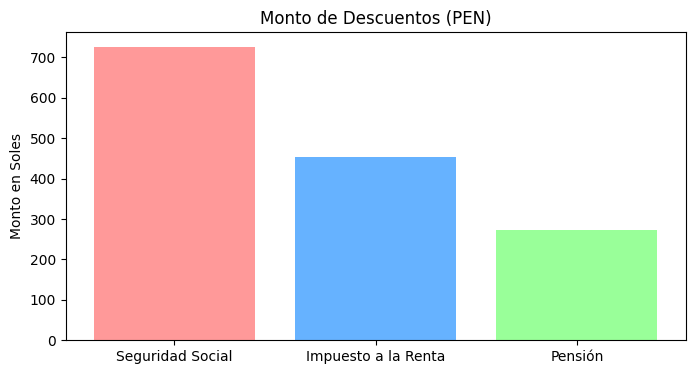

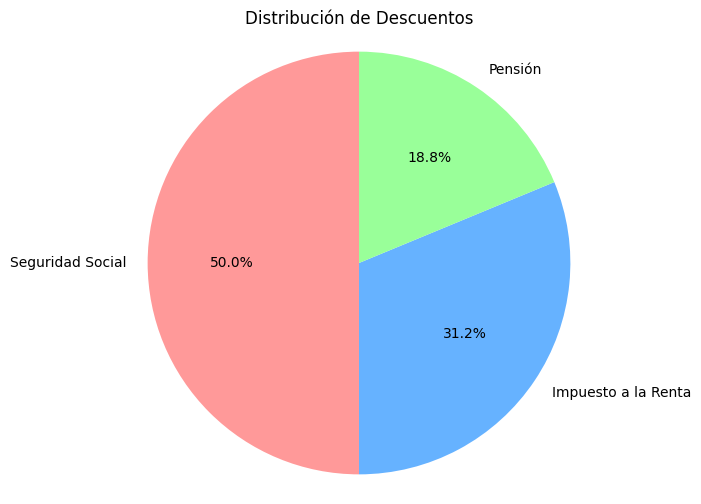

In [ ]:
import matplotlib.pyplot as plt

# Etiquetas y valores
descuentos = [descuento_ss, descuento_ir, descuento_pension]
etiquetas = ['Seguridad Social', 'Impuesto a la Renta', 'Pensión']

# Gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(etiquetas, descuentos, color=['#FF9999','#66B2FF','#99FF99'])
plt.title('Monto de Descuentos (PEN)')
plt.ylabel('Monto en Soles')
plt.show()

# Gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(descuentos, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B2FF','#99FF99'])
plt.title('Distribución de Descuentos')
plt.axis('equal')  # Para que sea un círculo perfecto
plt.show()

Ejercicio 4.3

In [ ]:
# Conjunto de temperaturas en grados Celsius
temperaturas_celsius = [-20, -10, 0, 10, 20, 25, 30, 37, 50, 100]

In [ ]:
# Conversión a Kelvin
temperaturas_kelvin = [c + 273.15 for c in temperaturas_celsius]

In [ ]:
# Mostrar ambas listas
for c, k in zip(temperaturas_celsius, temperaturas_kelvin):
    print(f"{c} °C = {k:.2f} K")

-20 °C = 253.15 K
-10 °C = 263.15 K
0 °C = 273.15 K
10 °C = 283.15 K
20 °C = 293.15 K
25 °C = 298.15 K
30 °C = 303.15 K
37 °C = 310.15 K
50 °C = 323.15 K
100 °C = 373.15 K


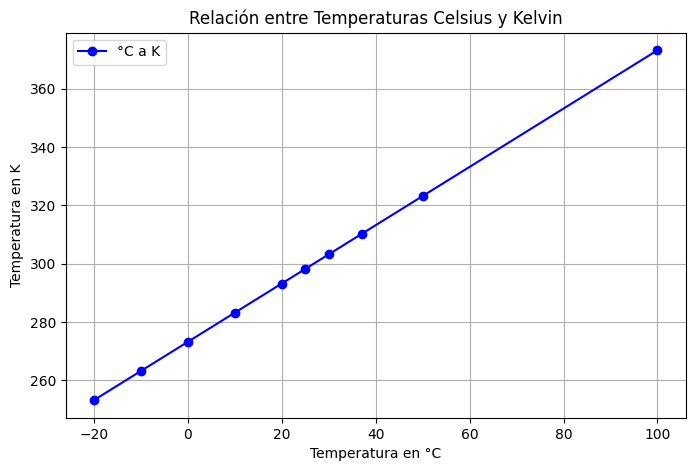

In [ ]:
# Gráfico de línea: Relación entre °C y K
plt.figure(figsize=(8,5))
plt.plot(temperaturas_celsius, temperaturas_kelvin, marker='o', linestyle='-', color='blue', label='°C a K')
plt.title('Relación entre Temperaturas Celsius y Kelvin')
plt.xlabel('Temperatura en °C')
plt.ylabel('Temperatura en K')
plt.grid(True)
plt.legend()
plt.show()